In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import datetime
%matplotlib inline
#from fbprophet import Prophet

In [2]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [6]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [7]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))

In [8]:
v1 = deaths_df.iloc[:,4:].sum().values
v = confirmed_df.iloc[:,4:].sum().values
data = pd.DataFrame(columns = ['Date','Value','Value1'])
data['Date'] = dates
data['Value'] = v
data['Value1'] = v1

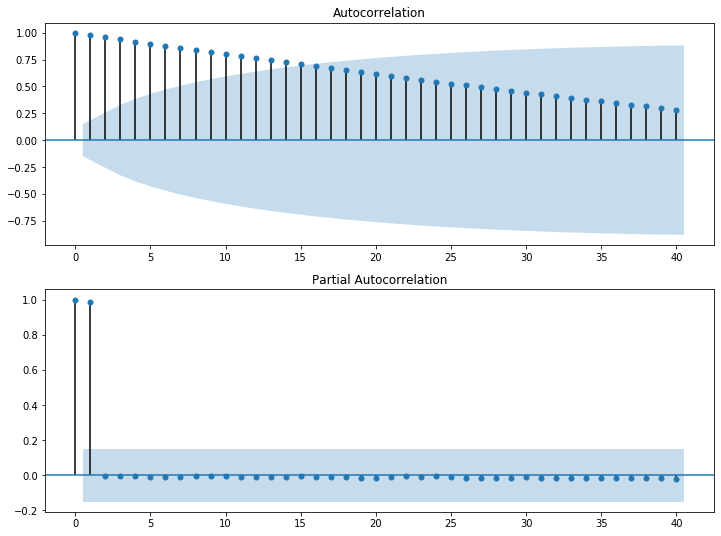

In [9]:
fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['Value'],lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['Value'], lags = 40, ax = ax2)

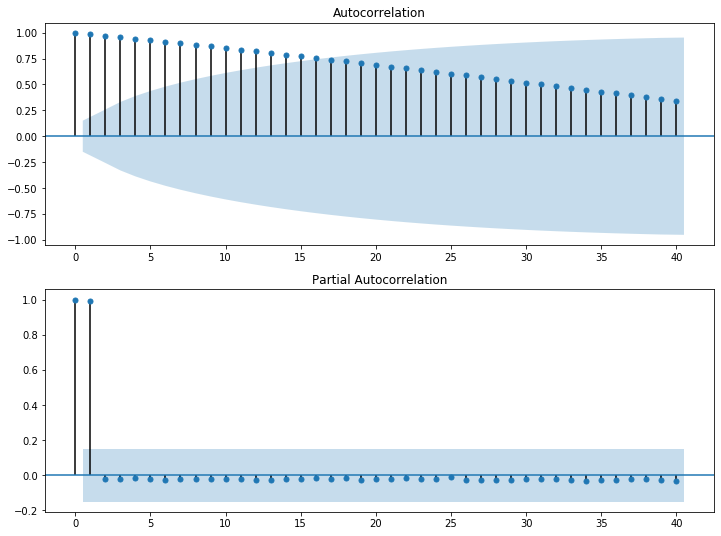

In [10]:
fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['Value1'],lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['Value1'], lags = 40, ax = ax2)

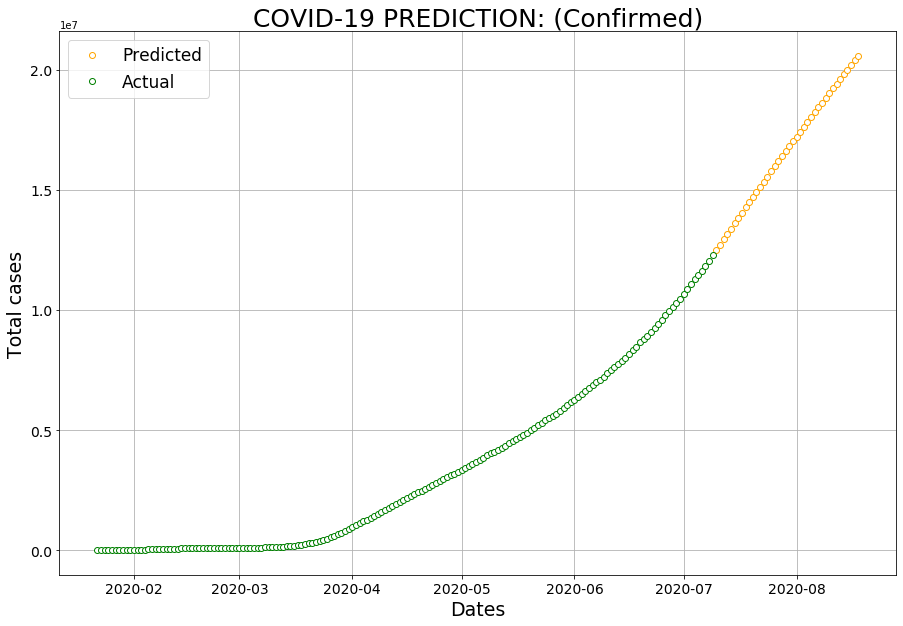

In [16]:
arima = ARIMA(data['Value'], order=(1, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 40)
pred_wc = list(forecast[0])

start_date = data['Date'].max()
pred_dates = []
for i in range(40):
    date = start_date + datetime.timedelta(days=1)
    pred_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 19)
plt.ylabel('Total cases',fontsize = 19)
plt.title("COVID-19 PREDICTION: (Confirmed)" , fontsize = 25)

plt.plot_date(x = pred_dates, y = pred_wc,marker = 'o',color = 'orange', markerfacecolor = '#ffffff',label = 'Predicted')
plt.plot_date(x = data['Date'], y = data['Value'],marker = 'o', color = 'g', markerfacecolor = '#ffffff',label = 'Actual')
plt.tick_params(labelsize = 14)
#plt.yscale('log')
plt.grid(which = 'both')
plt.legend(prop={'size':17})

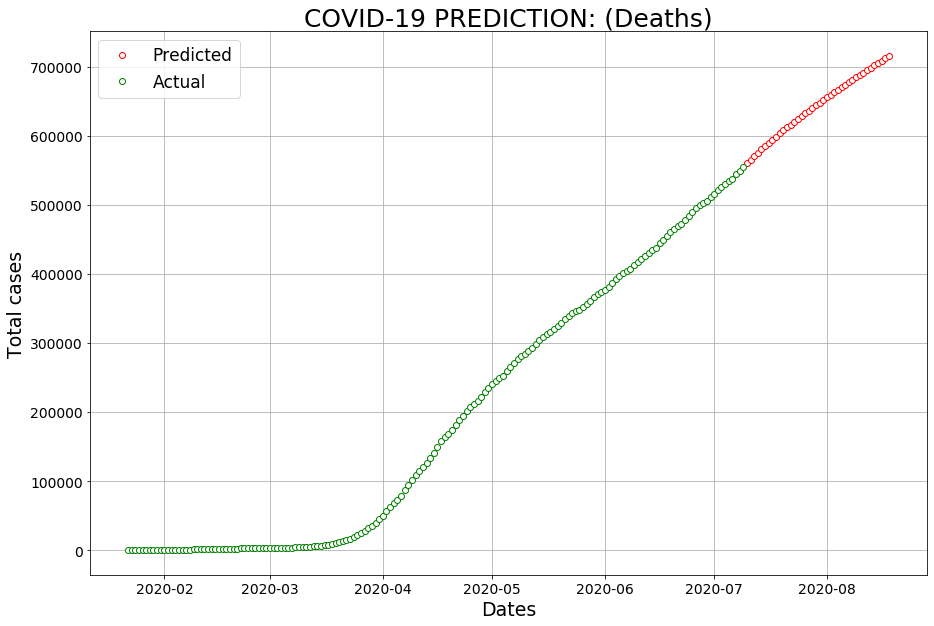

In [17]:
arima = ARIMA(data['Value1'], order=(1, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 40)
pred_wd = list(forecast[0])

start_date = data['Date'].max()
pred_dates = []
for i in range(40):
    date = start_date + datetime.timedelta(days=1)
    pred_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 19)
plt.ylabel('Total cases',fontsize = 19)
plt.title("COVID-19 PREDICTION: (Deaths)" , fontsize = 25)

plt.plot_date(x = pred_dates, y = pred_wd,marker = 'o',color = 'red', markerfacecolor = '#ffffff',label = 'Predicted')
plt.plot_date(x = data['Date'], y = data['Value1'],marker = 'o', color = 'g', markerfacecolor = '#ffffff',label = 'Actual')
plt.tick_params(labelsize = 14)
#plt.yscale('log')
plt.grid(which = 'both')
plt.legend(prop={'size':17})

In [18]:
Ind = confirmed_df[confirmed_df['Country/Region']== 'India'].iloc[:,4:]
Ind = Ind.values.tolist()[0]
Ind1 = deaths_df[deaths_df['Country/Region']== 'India'].iloc[:,4:]
Ind1 = Ind1.values.tolist()[0]
india = pd.DataFrame(columns = ['Date','conf','death'])
india['Date'] = dates
india['conf'] = Ind
india['death'] = Ind1

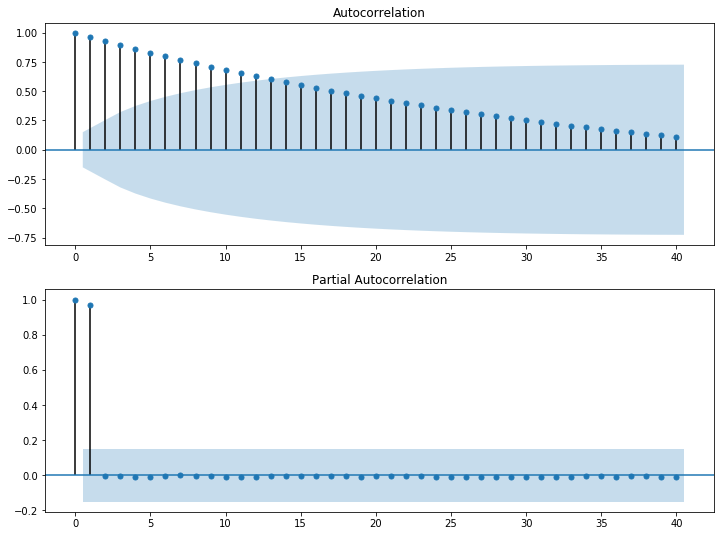

In [25]:
fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(211)
fig = plot_acf(india['conf'],lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(india['conf'], lags = 40, ax = ax2)

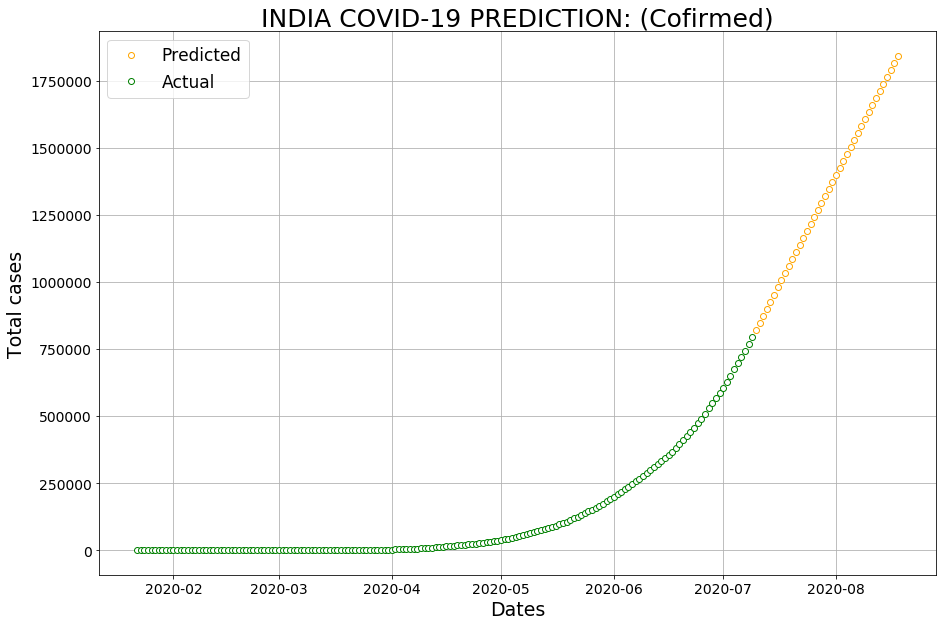

In [27]:
arima = ARIMA(india['conf'], order=(1, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 40)
pred = list(forecast[0])

start_date = india['Date'].max()
pred_dates = []
for i in range(40):
    date = start_date + datetime.timedelta(days=1)
    pred_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 19)
plt.ylabel('Total cases',fontsize = 19)
plt.title("INDIA COVID-19 PREDICTION: (Cofirmed)" , fontsize = 25)

plt.plot_date(x = pred_dates, y = pred,marker = 'o',color = 'orange', markerfacecolor = '#ffffff',label = 'Predicted')
plt.plot_date(x = india['Date'], y = india['conf'],marker = 'o', color = 'g', markerfacecolor = '#ffffff',label = 'Actual')
plt.tick_params(labelsize = 14)
#plt.yscale('log')
plt.grid(which = 'both')
plt.legend(prop={'size':17})

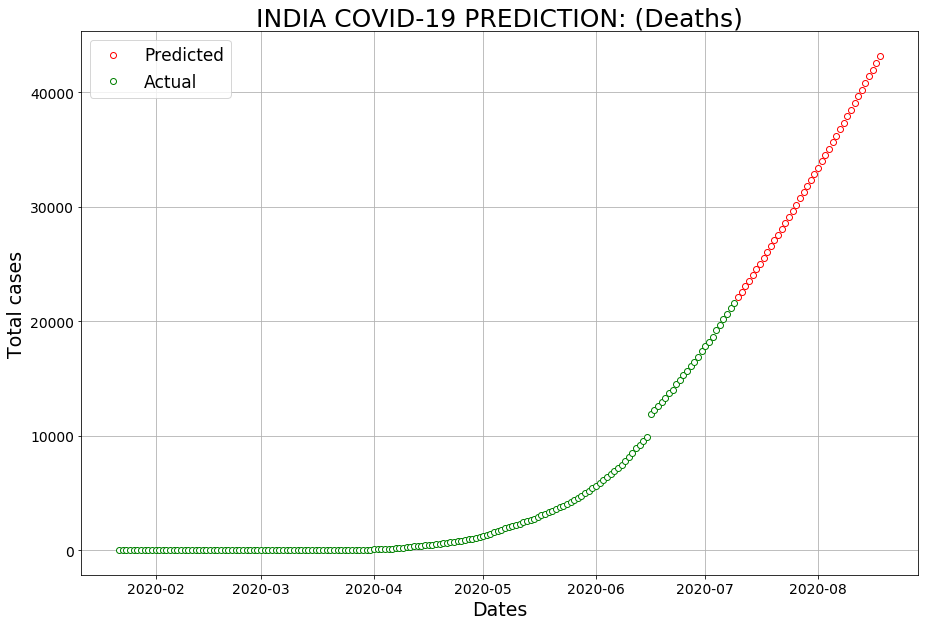

In [38]:
arima = ARIMA(india['death'], order=(1, 2, 5))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 40)
pred = list(forecast[0])

start_date = india['Date'].max()
pred_dates = []
for i in range(40):
    date = start_date + datetime.timedelta(days=1)
    pred_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 19)
plt.ylabel('Total cases',fontsize = 19)
plt.title("INDIA COVID-19 PREDICTION: (Deaths)" , fontsize = 25)

plt.plot_date(x = pred_dates, y = pred,marker = 'o',color = 'red', markerfacecolor = '#ffffff',label = 'Predicted')
plt.plot_date(x = india['Date'], y = india['death'],marker = 'o', color = 'g', markerfacecolor = '#ffffff',label = 'Actual')
plt.tick_params(labelsize = 14)
#plt.yscale('log')
plt.grid(which = 'both')
plt.legend(prop={'size':17})

In [39]:
us = confirmed_df[confirmed_df['Country/Region']== 'US'].iloc[:,4:]
us = us.values.tolist()[0]
us1 = deaths_df[deaths_df['Country/Region']== 'US'].iloc[:,4:]
us1 = us1.values.tolist()[0]
usa = pd.DataFrame(columns = ['Date','conf','death'])
usa['Date'] = dates
usa['conf'] = Ind
usa['death'] = Ind1

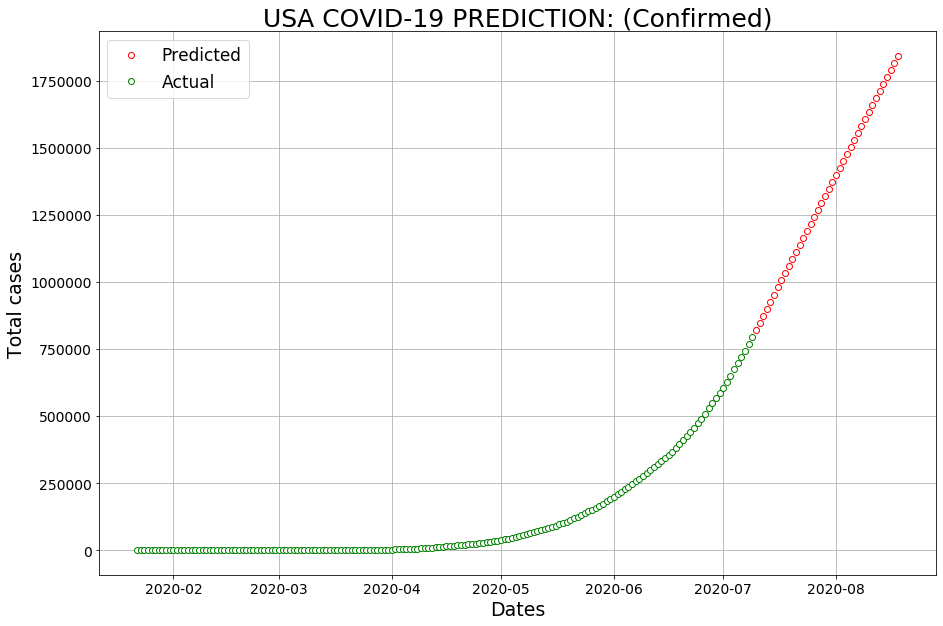

In [40]:
arima = ARIMA(usa['conf'], order=(1, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 40)
pred = list(forecast[0])

start_date = usa['Date'].max()
pred_dates = []
for i in range(40):
    date = start_date + datetime.timedelta(days=1)
    pred_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 19)
plt.ylabel('Total cases',fontsize = 19)
plt.title("USA COVID-19 PREDICTION: (Confirmed)" , fontsize = 25)

plt.plot_date(x = pred_dates, y = pred,marker = 'o',color = 'red', markerfacecolor = '#ffffff',label = 'Predicted')
plt.plot_date(x = usa['Date'], y = usa['conf'],marker = 'o', color = 'g', markerfacecolor = '#ffffff',label = 'Actual')
plt.tick_params(labelsize = 14)
#plt.yscale('log')
plt.grid(which = 'both')
plt.legend(prop={'size':17})

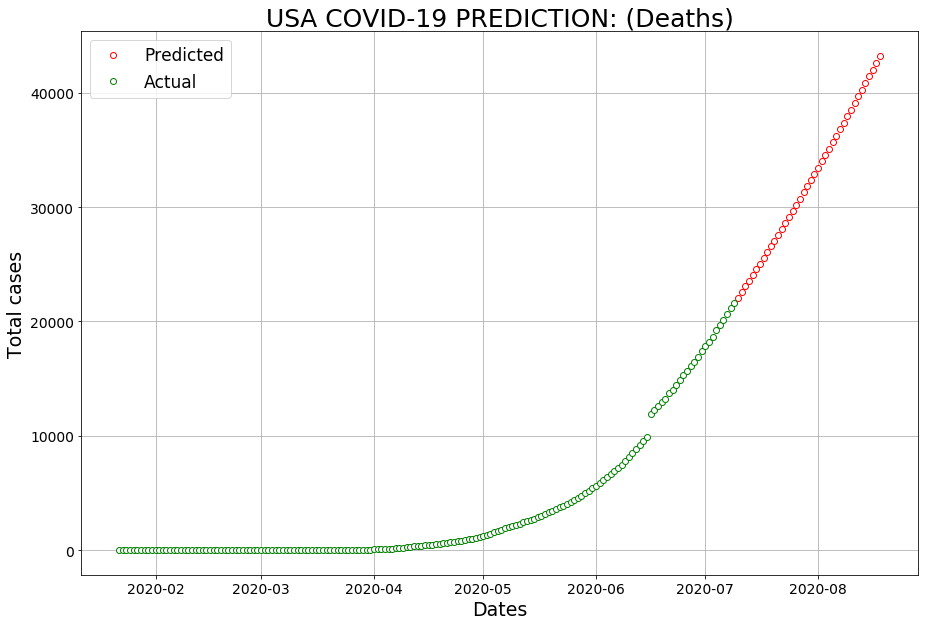

In [45]:
arima = ARIMA(usa['death'], order=(1, 2, 2))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 40)
pred = list(forecast[0])

start_date = usa['Date'].max()
pred_dates = []
for i in range(40):
    date = start_date + datetime.timedelta(days=1)
    pred_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 19)
plt.ylabel('Total cases',fontsize = 19)
plt.title("USA COVID-19 PREDICTION: (Deaths)" , fontsize = 25)

plt.plot_date(x = pred_dates, y = pred,marker = 'o',color = 'red', markerfacecolor = '#ffffff',label = 'Predicted')
plt.plot_date(x = usa['Date'], y = usa['death'],marker = 'o', color = 'g', markerfacecolor = '#ffffff',label = 'Actual')
plt.tick_params(labelsize = 14)
#plt.yscale('log')
plt.grid(which = 'both')
plt.legend(prop={'size':17})

In [24]:
world = pd.DataFrame(columns =['World Actual (Confirmed) ','World Predicted (Confirmed) ','World Actual (Deaths) ','World Predicted (Deaths) '], index = pred_dates)
world['World Predicted (Confirmed) '] = pred_wc
world['World Predicted (Deaths) '] = pred_wd
world.style.background_gradient(cmap = 'Wistia',axis = 1)

,World Actual (Confirmed),World Predicted (Confirmed),World Actual (Deaths),World Predicted (Deaths)
2020-07-10 00:00:00,nan,12494529.153856,nan,560245.999325
2020-07-11 00:00:00,nan,12719520.288612,nan,565441.957253
2020-07-12 00:00:00,nan,12943498.185922,nan,570519.360303
2020-07-13 00:00:00,nan,13166469.582351,nan,575485.250316
2020-07-14 00:00:00,nan,13388441.169675,nan,580346.250864
2020-07-15 00:00:00,nan,13609419.595182,nan,585108.592100
2020-07-16 00:00:00,nan,13829411.461963,nan,589778.134119
2020-07-17 00:00:00,nan,14048423.329208,nan,594360.388946
2020-07-18 00:00:00,nan,14266461.712498,nan,598860.541204
2020-07-19 00:00:00,nan,14483533.084097,nan,603283.467565
